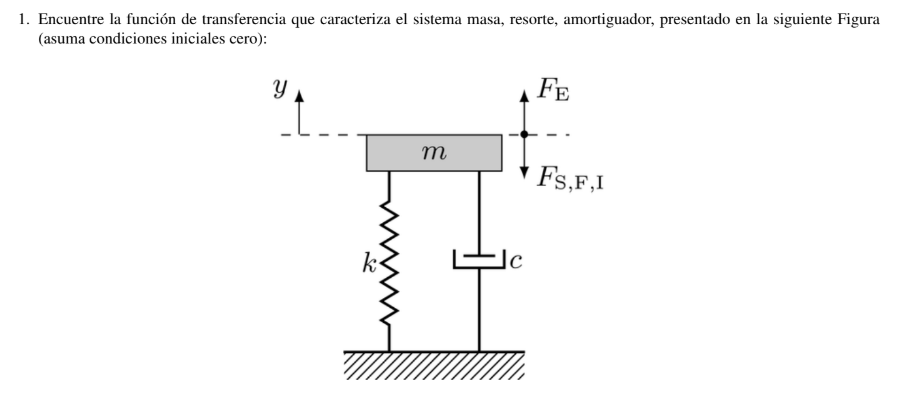

In [ ]:
!pip install sympy --upgrade #actualizar sympy para usar módulo de control

In [ ]:
import sympy as sym
import matplotlib.pyplot as plt
import numpy as np
sym.init_printing()

#se definen variables simbólicas y EDO
t, m, c, k = sym.symbols('t m c k', real=True)
Fe = sym.Function('Fe')(t)
y = sym.Function('y')(t)

ode = sym.Eq(m*y.diff(t, 2) + c*y.diff(t) + k*y, Fe)
ode

                         2               
  d                     d                
c⋅──(y(t)) + k⋅y(t) + m⋅───(y(t)) = Fe(t)
  dt                      2              
                        dt               

In [ ]:
s = sym.symbols('s', complex=True)
H = 1/(m*s**2 + c*s + k) #función de transferencia en lazo cerrado slit 2 orden
H

      1       
──────────────
             2
c⋅s + k + m⋅s 

Ya tenemos la equacion base para las fuerzas externas, ahora debemos aplicar la tranformada de laplace con la siguiente informacion

$
\mathcal{L}{y(t)} = Y(s) - y(0)
$

$
\mathcal{L}\left\{\frac{dy(t)}{dt}\right\} = sY(s) - y(0)
$

$
\mathcal{L}\left\{\frac{d^2y(t)}{dt^2}\right\} = s^2Y(s) - y(0)
$

el ejercicio nos dice que las condiciones iniciales son igual a cero por lo cual

$
y(0) = 0
$

$
\mathcal{L}{y(t)} = Y(s)
$

$
\mathcal{L}\left\{\frac{dy(t)}{dt}\right\} = sY(s)
$

$
\mathcal{L}\left\{\frac{d^2y(t)}{dt^2}\right\} = s^2Y(s)
$

Ahora aplicamos la transformada de laplace a nuestra ecuacion

$
\mathcal{L}{F_e(t)} = \mathcal{L}\left\{\frac{md^2y(t)}{dt^2}\right\} + \mathcal{L}\left\{\frac{cdy(t)}{dt}\right\} + \mathcal{L}{ky(t)}
$

$
\mathcal{L}{F_e(t)} = m\mathcal{L}\left\{\frac{d^2y(t)}{dt^2}\right\} + c\mathcal{L}\left\{\frac{dy(t)}{dt}\right\} + k\mathcal{L}{y(t)}
$

$
{F(s)} = ms^2Y(s) + csY(s) + kY(s)
$

sacamos factor comun con $Y(s)$

$
{F(s)} = (ms^2Y(s) + csY(s) + k)Y(s)
$

$
\frac{F(s)}{Y(s)} = ms^2 + cs + k
$

tenemos que la funcion de transferencia es igual a

$
H(s) = \frac{Y(s)}{F(s)}
$

$
\frac{Y(s)}{F(s)} = \frac{1}{ms^2 + cs + k}
$

$
H(s) = \frac{1}{ms^2 + cs + k}
$


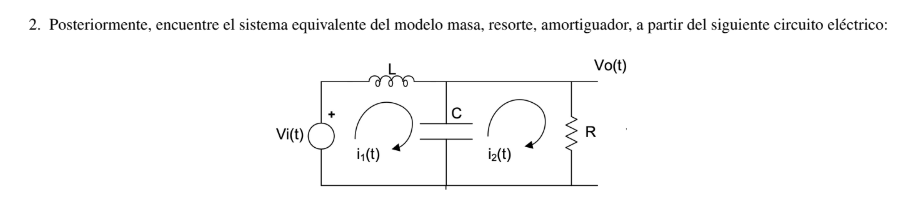

Para poder calcular la funcion de transferencia usaremos el metodo nodos, el cual nos dice que la suma de las corrientes entrantes a un nodo es igual a la suma de las corrientes salientes de ese mismo nodo, establecemos que la corriente del inductor entra al nodo, y las corrientes del capacitor y resistencia son las que salen, primero vamos a definir las corrientes en cada elemento


$
I_l(t) = \frac{1}{L}\int V_i(t) \,dt
$

$
I_c(t) = C\frac{dV_o(t)}{dt}
$

$
I_R(t) = \frac{V_o(t)}{R}
$

Igualamos en el nodo

$
\frac{1}{L}\int V_i(t) \,dt = C\frac{dV_o(t)}{dt} +  \frac{V_o(t)}{R}
$

Ahora procedemos a aplicar laplace, para eso utilizamos las equivalencias en laplace de la ingetral y la derivada

$
\mathcal{L}\left\{\frac{dy(t)}{dt}\right\} = sY(s)
$

$
\mathcal{L}\left\{\int{y(t)dt}\right\} = \frac{Y(s)}{s}
$


$
\frac{1}{L}\mathcal{L}\left\{\int{V_i(t)dt}\right\} = C\mathcal{L}\left\{\frac{dV_o(t)}{dt}\right\} + \frac{1}{R}\mathcal{L}{dV_o(t)}
$

$
\frac{1}{Ls} V_i(s) = CSV_o(s) +  \frac{V_o(s)}{R}
$

$
\frac{V_i(s)}{V_o(s)} = \frac{RCLs^2+Ls}{R}
$

$
H(s) = \frac{R}{RCLs^2+Ls}
$

Finalmente tenemos que la funcion de transferencia del modelo equivalente es igual a

$
H(s) = \frac{1}{CLs^2+\frac{Ls}{R}}
$



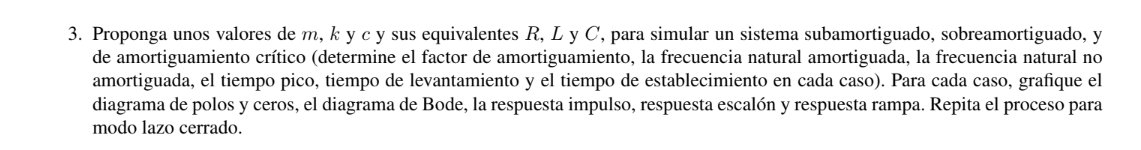

Primero debemos tener en cuenta que para que el sistema sea subamortiguado, sobreamortiguado etc. se deben cumpllir unas condiciones con respecto al factor de amortiguamiento.

sabemos que el factor de amortiguamiento en un sistema masa resorte es igual a

$
\zeta = \frac{c}{2\sqrt{km}}
$

dependiendo de el valor que tome el factor el sistema sera subamortiguado, sobreamortiguado o criticamente amortiguado

ζ<1 → Subamortiguado (oscila antes de estabilizarse).

ζ=1 → Críticamente amortiguado (tiempo mínimo de estabilización sin oscilaciones).

ζ>1 → Sobreamortiguado (respuesta más lenta sin oscilaciones).

para todos los casos vamos a asumir los valores de k y m y dejaremos como incognita la variable c

- Sobre-amortiguado

$
\frac{c}{2\sqrt{km}} < 1 , k = 2, m = 8
$

$
\frac{c}{2\sqrt{16}} < 1
$

$
\frac{c}{8} < 1
$

$
c < 8
$

tenemos que para que el sistema tenga una salida sobre-amortiguada, el valor de c debe ser mayor a 8, por lo cual lo vamos a establecer en 16

para una salida sub-amortiguada debe ser de la siguiente forma

$
c > 8
$

tomaremos un valor de c  = 16 para este caso

por ultimo para que sea criticamente amortiguado debe seguir la siguiente forma

$
c = 8
$

los valores de R, L y C seran los siguientes

$
m = CL , c = \frac{L}{R}
$

- Sobre-amortiguado

$
8 = CL , 16 = \frac{L}{R}
$

$
C = 4, L = 2, R = 0.125
$

- Sub-amortiguado


$
8 = CL , 4 = \frac{L}{R}
$

$
C = 4, L = 2, R = 0.5
$

- Criticamente-amortiguado


$
8 = CL , 8 = \frac{L}{R}
$

$
C = 4, L = 2, R = 0.25
$


Subamortiguado (ζ < 1)
Factor de amortiguamiento (ζ): 0.3536
Frecuencia natural no amortiguada (ω_n): 0.3536 rad/s
Frecuencia natural amortiguada (ω_d): 0.3307 rad/s
Tiempo pico (t_p): 9.4993 s
Tiempo de levantamiento (t_r): 2.4351 s
Tiempo de establecimiento (t_s): 32.0000 s


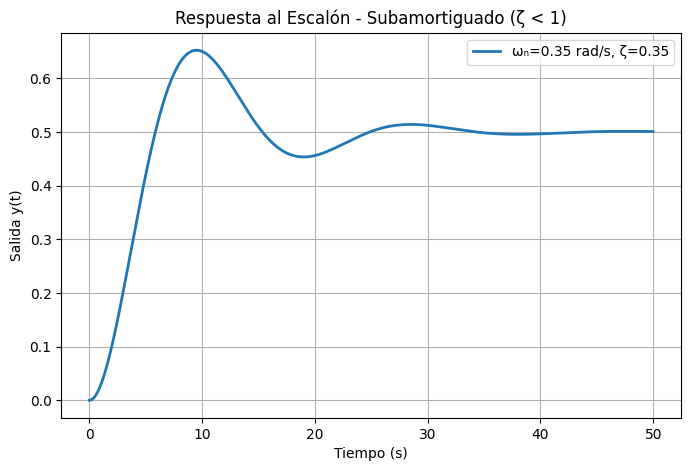


Críticamente Amortiguado (ζ = 1)
Factor de amortiguamiento (ζ): 0.7071
Frecuencia natural no amortiguada (ω_n): 0.3536 rad/s
Frecuencia natural amortiguada (ω_d): 0.2500 rad/s
Tiempo pico (t_p): 12.5664 s
Tiempo de levantamiento (t_r): 2.0869 s
Tiempo de establecimiento (t_s): 16.0000 s


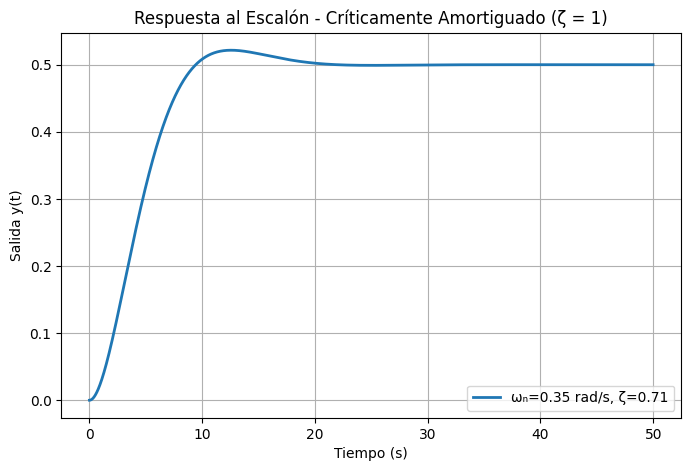


Sobreamortiguado (ζ > 1)
Factor de amortiguamiento (ζ): 1.4142
Frecuencia natural no amortiguada (ω_n): 0.3536 rad/s
Frecuencia natural amortiguada (ω_d): 0.0000 rad/s
Tiempo pico (t_p): No aplica (sistema sobreamortiguado)
Tiempo de levantamiento (t_r): 1.5265 s
Tiempo de establecimiento (t_s): 8.0000 s


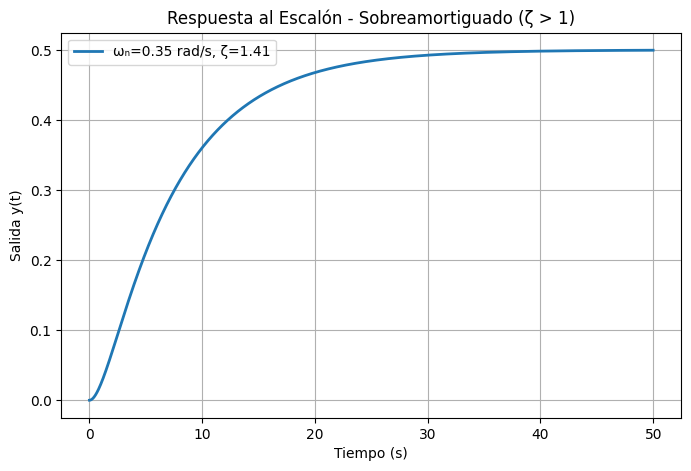

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal

def plot_response(m, c, k, t_end=50, dt=0.01, title=""):
    # Calcular parámetros del sistema
    omega_n = np.sqrt(k / m)  # Frecuencia natural no amortiguada
    zeta = c / (2 * np.sqrt(k * m))  # Factor de amortiguamiento

    # Frecuencia natural amortiguada (solo si el sistema no es sobreamortiguado)
    if zeta < 1:
        omega_d = omega_n * np.sqrt(1 - zeta**2)
    else:
        omega_d = 0  # No hay oscilación en sistemas sobreamortiguados

    # Calcular tiempos característicos
    if zeta < 1:  # Solo tiene sentido si el sistema oscila
        t_p = np.pi / omega_d  # Tiempo pico
    else:
        t_p = None  # No hay pico en sistemas sobreamortiguados

    t_r = (1 - 0.416 * zeta + 0.064 * zeta**2) / omega_n  # Tiempo de levantamiento
    t_s = 4 / (zeta * omega_n)  # Tiempo de establecimiento (criterio 2%)

    # Imprimir resultados
    print(f"\n{title}")
    print("=" * len(title))
    print(f"Factor de amortiguamiento (ζ): {zeta:.4f}")
    print(f"Frecuencia natural no amortiguada (ω_n): {omega_n:.4f} rad/s")
    print(f"Frecuencia natural amortiguada (ω_d): {omega_d:.4f} rad/s")
    if t_p:
        print(f"Tiempo pico (t_p): {t_p:.4f} s")
    else:
        print("Tiempo pico (t_p): No aplica (sistema sobreamortiguado)")
    print(f"Tiempo de levantamiento (t_r): {t_r:.4f} s")
    print(f"Tiempo de establecimiento (t_s): {t_s:.4f} s")

    # Definir función de transferencia
    num = [1]  # Numerador
    den = [m, c, k]  # Denominador
    system = signal.TransferFunction(num, den)

    # Simulación de la respuesta al escalón
    t = np.arange(0, t_end, dt)
    t, y = signal.step(system, T=t)

    # Graficar la respuesta
    plt.figure(figsize=(8, 5))
    plt.plot(t, y, label=f'ωₙ={omega_n:.2f} rad/s, ζ={zeta:.2f}', linewidth=2)
    plt.xlabel('Tiempo (s)')
    plt.ylabel('Salida y(t)')
    plt.title(f'Respuesta al Escalón - {title}')
    plt.legend()
    plt.grid()
    plt.show()

# CASOS A EVALUAR
# Subamortiguado (ζ < 1)
plot_response(m=16, c=4, k=2, title="Subamortiguado (ζ < 1)")

# Críticamente amortiguado (ζ = 1)
plot_response(m=16, c=8, k=2, title="Críticamente Amortiguado (ζ = 1)")

# Sobreamortiguado (ζ > 1)
plot_response(m=16, c=16, k=2, title="Sobreamortiguado (ζ > 1)")



Caso: Subamortiguado - c = 4.00


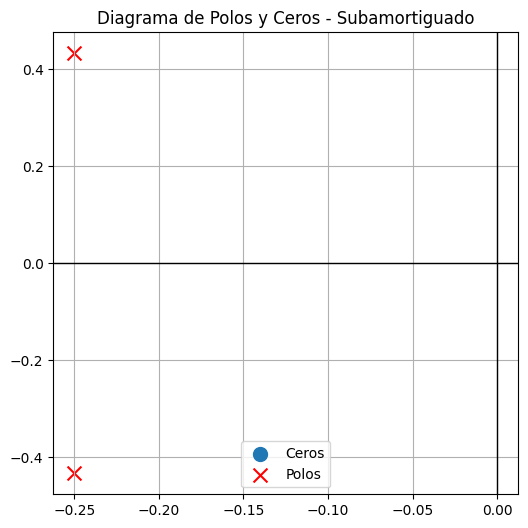

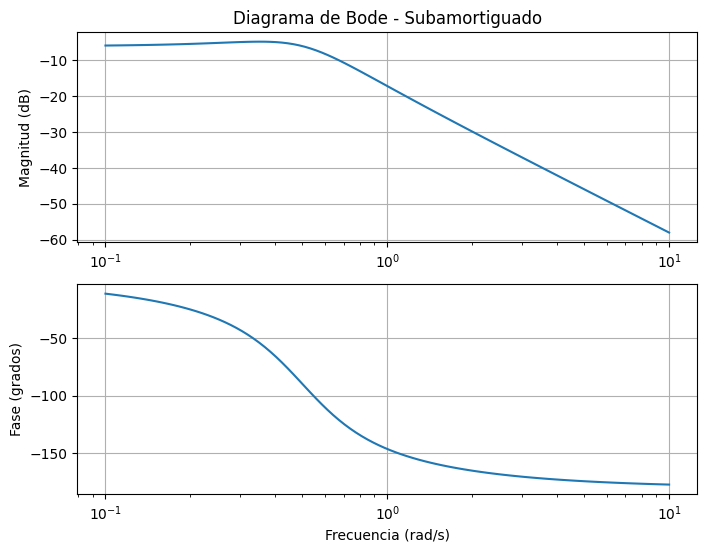

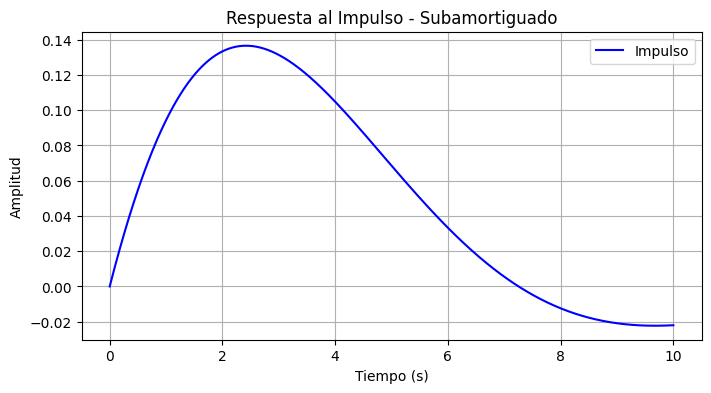

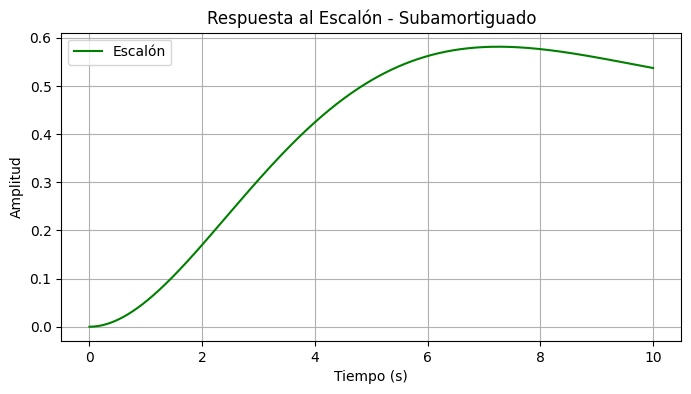

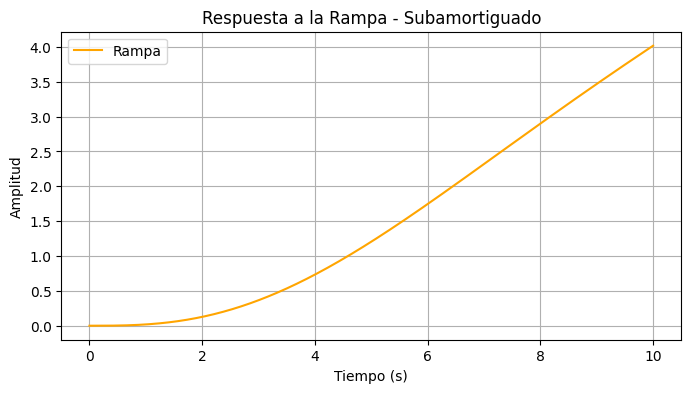


Caso: Críticamente amortiguado - c = 8.00


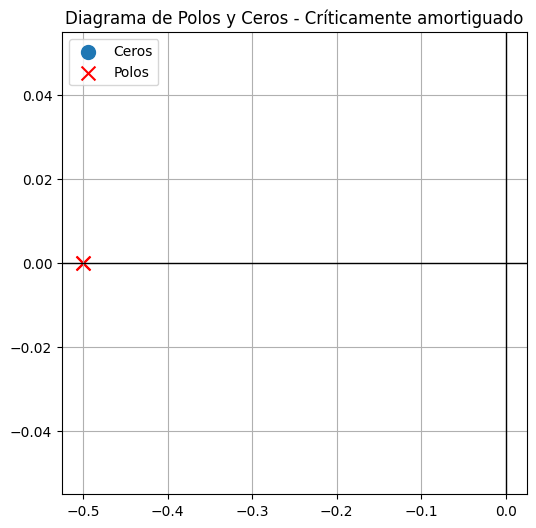

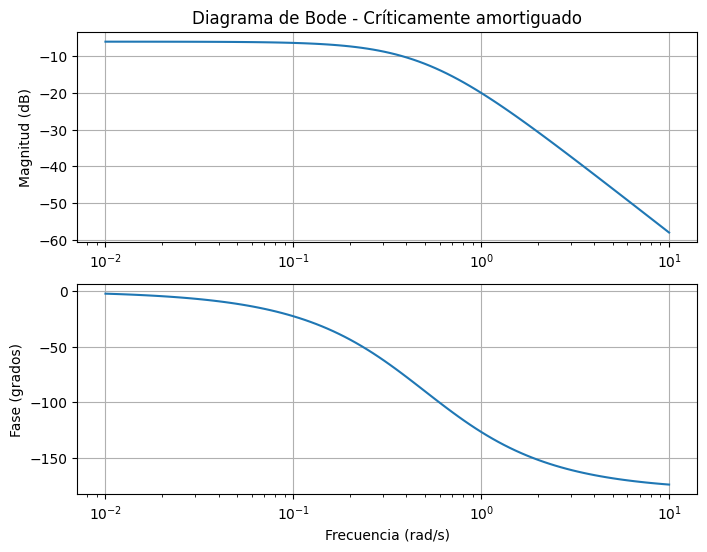

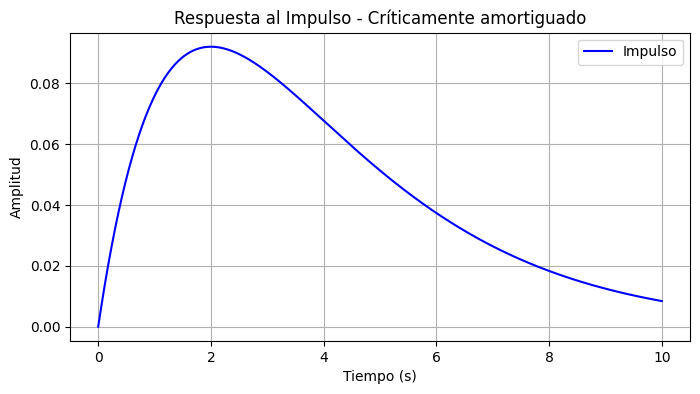

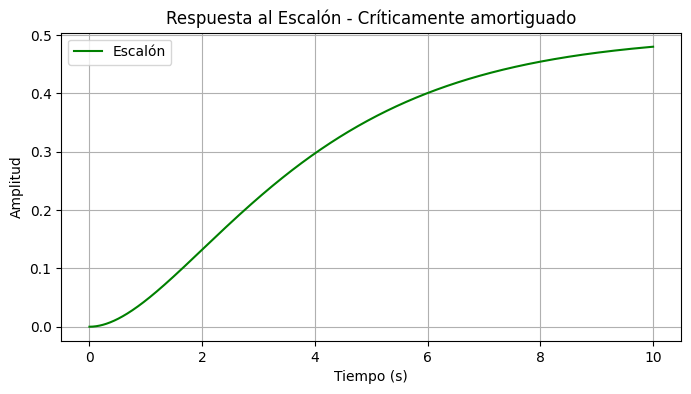

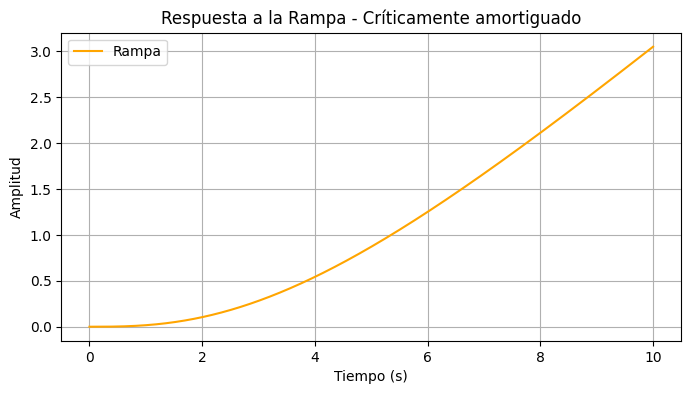


Caso: Sobreamortiguado - c = 16.00


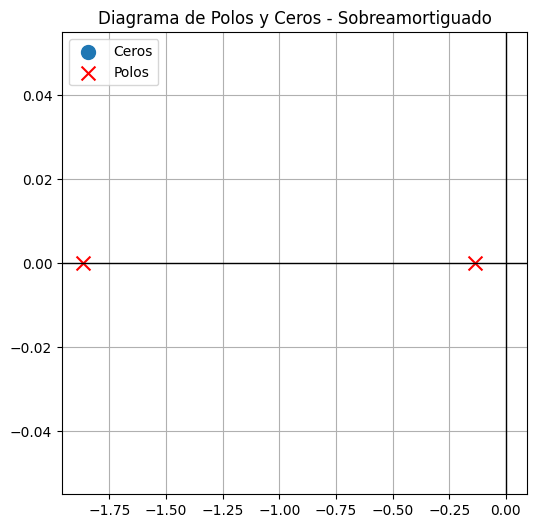

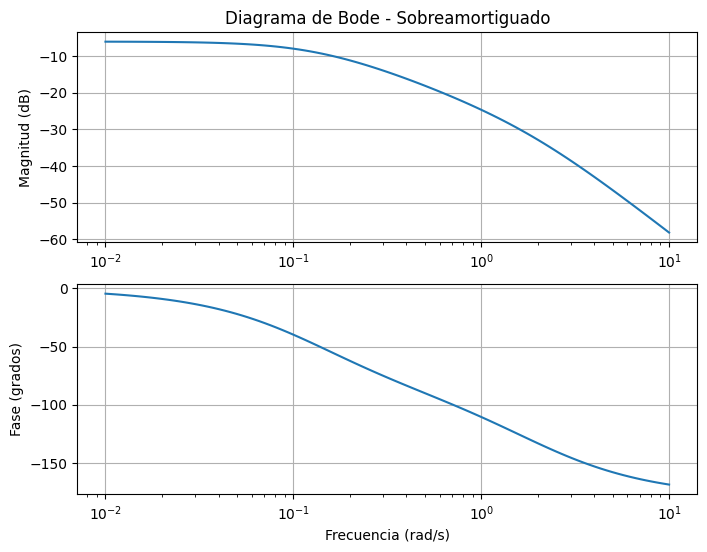

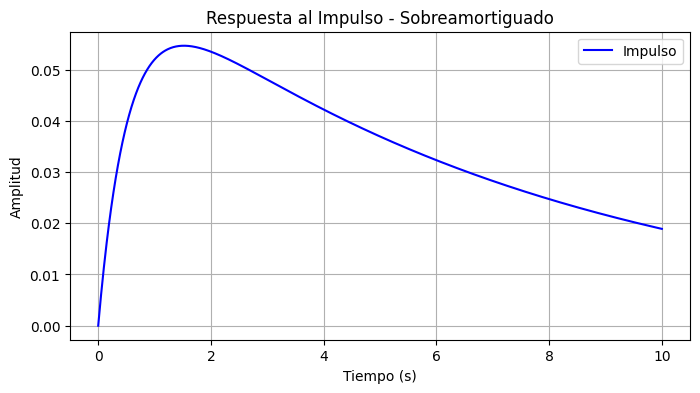

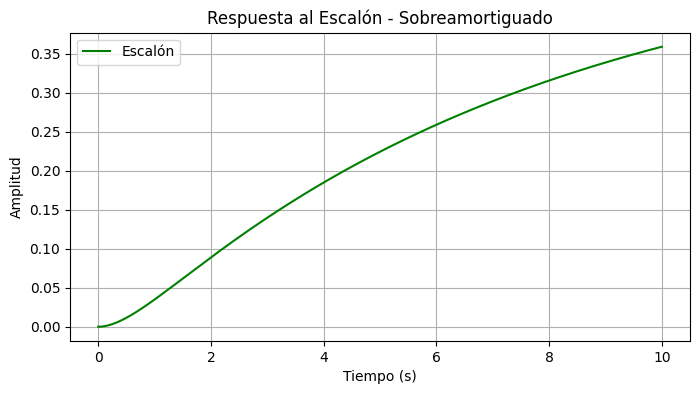

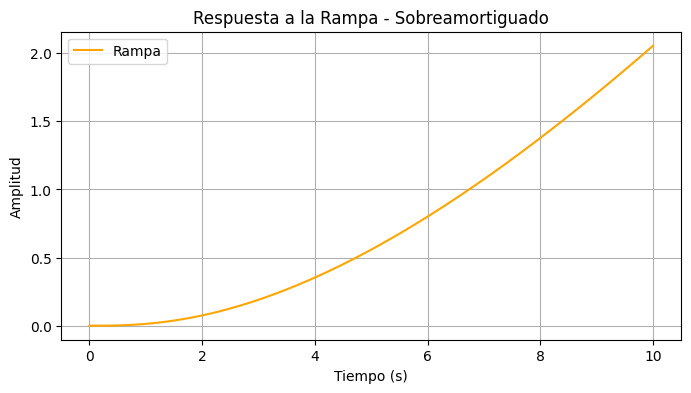

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal

# Definimos los valores de m y k
m = 8
k = 2

# Calculamos el valor crítico de c
c_critico = 2 * np.sqrt(m * k)

# Definimos tres casos de amortiguamiento
casos = {
    "Subamortiguado": c_critico * 0.5,  # c menor que el crítico
    "Críticamente amortiguado": c_critico,  # c igual al crítico
    "Sobreamortiguado": c_critico * 2  # c mayor que el crítico
}

# Rango de tiempo
t = np.linspace(0, 10, 1000)

for tipo, c in casos.items():
    print(f"\nCaso: {tipo} - c = {c:.2f}")

    # Función de transferencia H(s) = 1 / (m s^2 + c s + k)
    num = [1]
    den = [m, c, k]
    system = signal.TransferFunction(num, den)

    # Obtener polos y ceros
    zeros, poles, _ = signal.tf2zpk(num, den)

    # Respuesta al impulso
    t_imp, y_imp = signal.impulse(system, T=t)

    # Respuesta al escalón
    t_step, y_step = signal.step(system, T=t)

    # Respuesta a la rampa (integrando la respuesta al escalón)
    y_ramp = np.cumsum(y_step) * (t[1] - t[0])

    # Diagrama de Polos y Ceros
    plt.figure(figsize=(6, 6))
    plt.scatter(np.real(zeros), np.imag(zeros), s=100, marker='o', label="Ceros")
    plt.scatter(np.real(poles), np.imag(poles), s=100, marker='x', label="Polos", color="red")
    plt.axhline(0, color='black', lw=1)
    plt.axvline(0, color='black', lw=1)
    plt.grid()
    plt.legend()
    plt.title(f"Diagrama de Polos y Ceros - {tipo}")
    plt.show()

    # Diagrama de Bode
    w, mag, phase = signal.bode(system)

    plt.figure(figsize=(8, 6))
    plt.subplot(2, 1, 1)
    plt.semilogx(w, mag)  # Magnitud
    plt.title(f"Diagrama de Bode - {tipo}")
    plt.ylabel("Magnitud (dB)")
    plt.grid()

    plt.subplot(2, 1, 2)
    plt.semilogx(w, phase)  # Fase
    plt.xlabel("Frecuencia (rad/s)")
    plt.ylabel("Fase (grados)")
    plt.grid()
    plt.show()

    # Respuesta al impulso
    plt.figure(figsize=(8, 4))
    plt.plot(t_imp, y_imp, label="Impulso", color='blue')
    plt.xlabel("Tiempo (s)")
    plt.ylabel("Amplitud")
    plt.title(f"Respuesta al Impulso - {tipo}")
    plt.grid()
    plt.legend()
    plt.show()

    # Respuesta al escalón
    plt.figure(figsize=(8, 4))
    plt.plot(t_step, y_step, label="Escalón", color='green')
    plt.xlabel("Tiempo (s)")
    plt.ylabel("Amplitud")
    plt.title(f"Respuesta al Escalón - {tipo}")
    plt.grid()
    plt.legend()
    plt.show()

    # Respuesta a la rampa
    plt.figure(figsize=(8, 4))
    plt.plot(t, y_ramp, label="Rampa", color='orange')
    plt.xlabel("Tiempo (s)")
    plt.ylabel("Amplitud")
    plt.title(f"Respuesta a la Rampa - {tipo}")
    plt.grid()
    plt.legend()
    plt.show()

# Lazo Cerrado


Subamortiguado (ζ < 1) (Lazo Cerrado)
Factor de amortiguamiento (ζ): 0.3536
Frecuencia natural no amortiguada (ω_n): 0.3536 rad/s
Frecuencia natural amortiguada (ω_d): 0.3307 rad/s
Tiempo pico (t_p): 9.4993 s
Tiempo de levantamiento (t_r): 2.4351 s
Tiempo de establecimiento (t_s): 32.0000 s


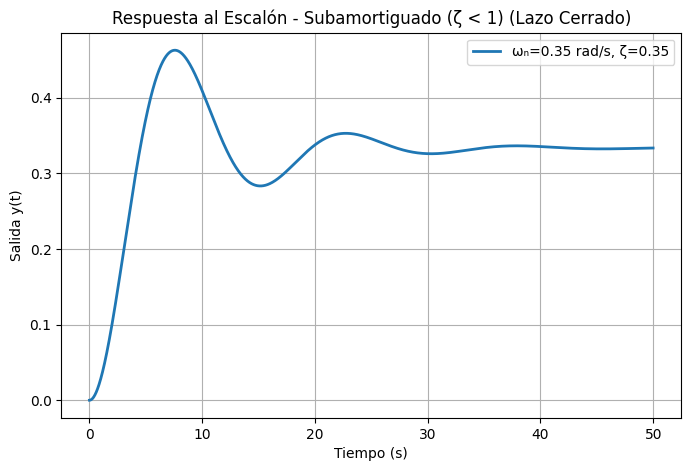


Críticamente Amortiguado (ζ = 1) (Lazo Cerrado)
Factor de amortiguamiento (ζ): 0.7071
Frecuencia natural no amortiguada (ω_n): 0.3536 rad/s
Frecuencia natural amortiguada (ω_d): 0.2500 rad/s
Tiempo pico (t_p): 12.5664 s
Tiempo de levantamiento (t_r): 2.0869 s
Tiempo de establecimiento (t_s): 16.0000 s


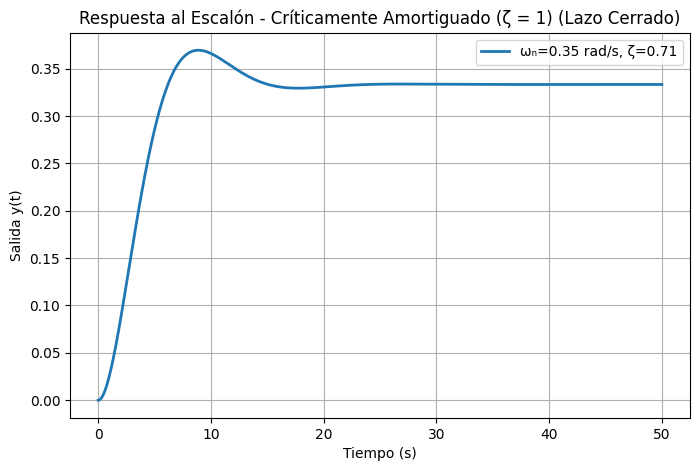


Sobreamortiguado (ζ > 1) (Lazo Cerrado)
Factor de amortiguamiento (ζ): 1.4142
Frecuencia natural no amortiguada (ω_n): 0.3536 rad/s
Frecuencia natural amortiguada (ω_d): 0.0000 rad/s
Tiempo pico (t_p): No aplica (sistema sobreamortiguado)
Tiempo de levantamiento (t_r): 1.5265 s
Tiempo de establecimiento (t_s): 8.0000 s


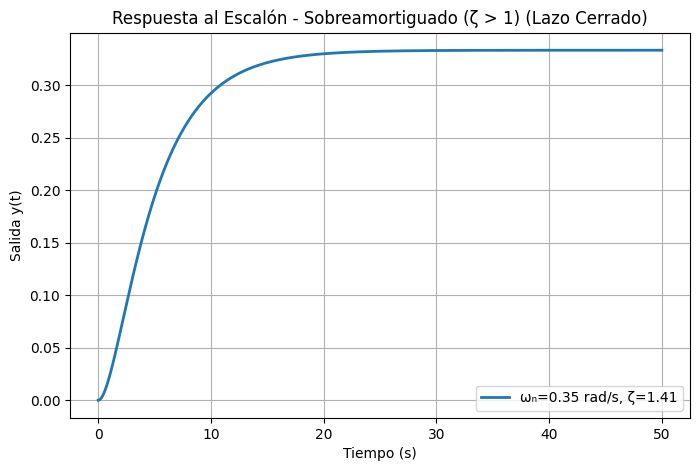

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal

def plot_response_closed_loop(m, c, k, t_end=50, dt=0.01, title=""):
    # Calcular parámetros del sistema
    omega_n = np.sqrt(k / m)  # Frecuencia natural no amortiguada
    zeta = c / (2 * np.sqrt(k * m))  # Factor de amortiguamiento

    # Frecuencia natural amortiguada
    if zeta < 1:
        omega_d = omega_n * np.sqrt(1 - zeta**2)
    else:
        omega_d = 0  # No hay oscilación en sistemas sobreamortiguados

    # Calcular tiempos característicos
    if zeta < 1:  # Solo si hay oscilación
        t_p = np.pi / omega_d  # Tiempo pico
    else:
        t_p = None  # No hay pico en sistemas sobreamortiguados

    t_r = (1 - 0.416 * zeta + 0.064 * zeta**2) / omega_n  # Tiempo de levantamiento
    t_s = 4 / (zeta * omega_n)  # Tiempo de establecimiento (criterio 2%)

    # Imprimir resultados
    print(f"\n{title} (Lazo Cerrado)")
    print("=" * (len(title) + 13))
    print(f"Factor de amortiguamiento (ζ): {zeta:.4f}")
    print(f"Frecuencia natural no amortiguada (ω_n): {omega_n:.4f} rad/s")
    print(f"Frecuencia natural amortiguada (ω_d): {omega_d:.4f} rad/s")
    if t_p:
        print(f"Tiempo pico (t_p): {t_p:.4f} s")
    else:
        print("Tiempo pico (t_p): No aplica (sistema sobreamortiguado)")
    print(f"Tiempo de levantamiento (t_r): {t_r:.4f} s")
    print(f"Tiempo de establecimiento (t_s): {t_s:.4f} s")

    # Función de transferencia en lazo abierto
    num_open = [1]  # Numerador
    den_open = [m, c, k]  # Denominador
    system_open = signal.TransferFunction(num_open, den_open)

    # Función de transferencia en lazo cerrado
    num_closed = num_open  # En lazo cerrado, el numerador se mantiene
    den_closed = np.polyadd(num_open, den_open)  # (1 + G(s)) en el denominador
    system_closed = signal.TransferFunction(num_closed, den_closed)

    # Simulación de la respuesta al escalón
    t = np.arange(0, t_end, dt)
    t, y = signal.step(system_closed, T=t)

    # Graficar la respuesta
    plt.figure(figsize=(8, 5))
    plt.plot(t, y, label=f'ωₙ={omega_n:.2f} rad/s, ζ={zeta:.2f}', linewidth=2)
    plt.xlabel('Tiempo (s)')
    plt.ylabel('Salida y(t)')
    plt.title(f'Respuesta al Escalón - {title} (Lazo Cerrado)')
    plt.legend()
    plt.grid()
    plt.show()

# CASOS A EVALUAR EN LAZO CERRADO
# Subamortiguado (ζ < 1)
plot_response_closed_loop(m=16, c=4, k=2, title="Subamortiguado (ζ < 1)")

# Críticamente amortiguado (ζ = 1)
plot_response_closed_loop(m=16, c=8, k=2, title="Críticamente Amortiguado (ζ = 1)")

# Sobreamortiguado (ζ > 1)
plot_response_closed_loop(m=16, c=16, k=2, title="Sobreamortiguado (ζ > 1)")



Caso: Subamortiguado - c = 5.66


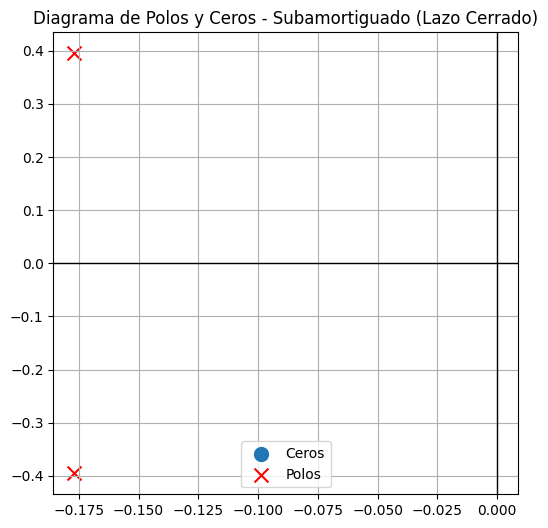

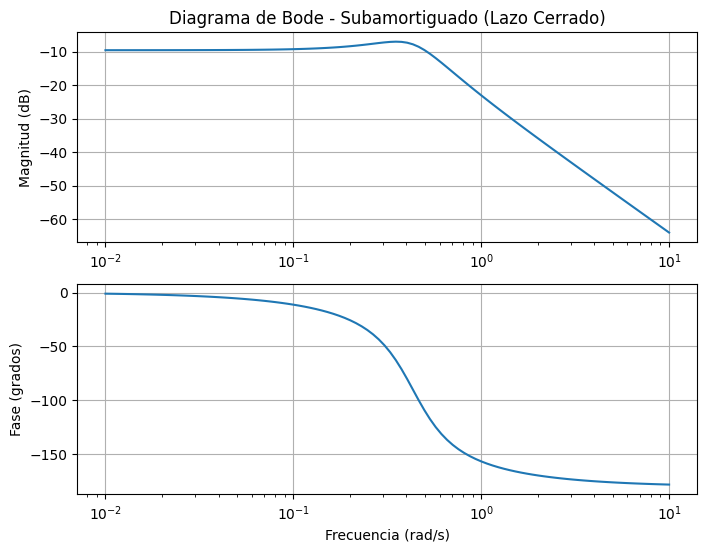

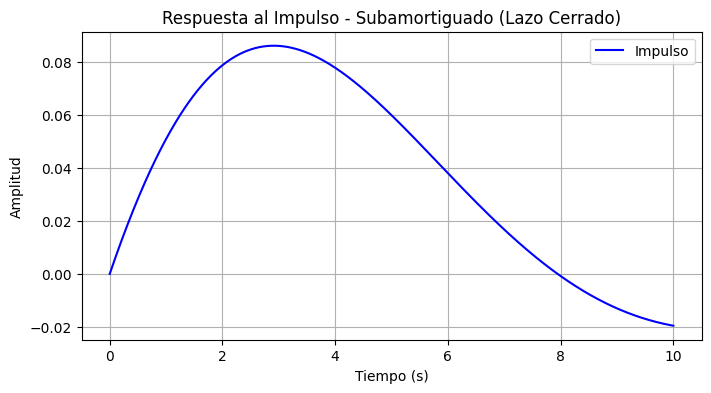

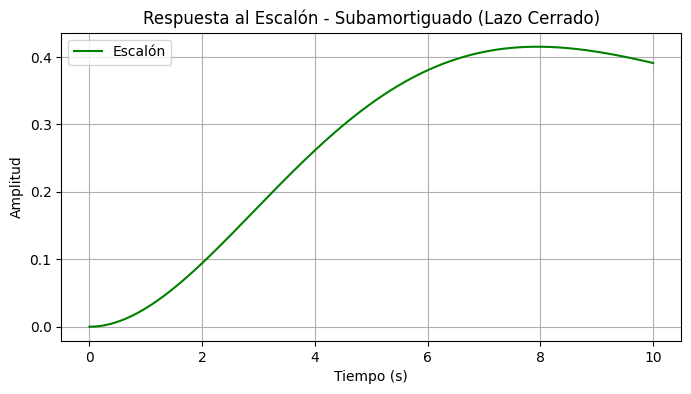

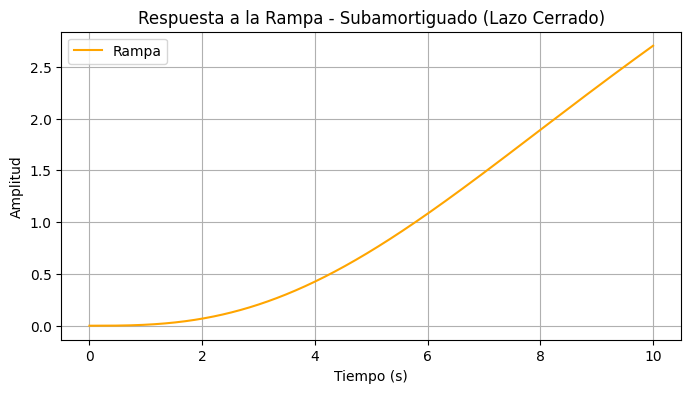


Caso: Críticamente amortiguado - c = 11.31


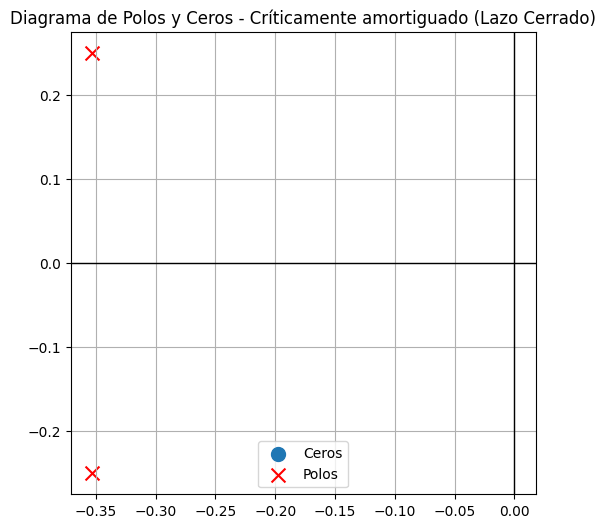

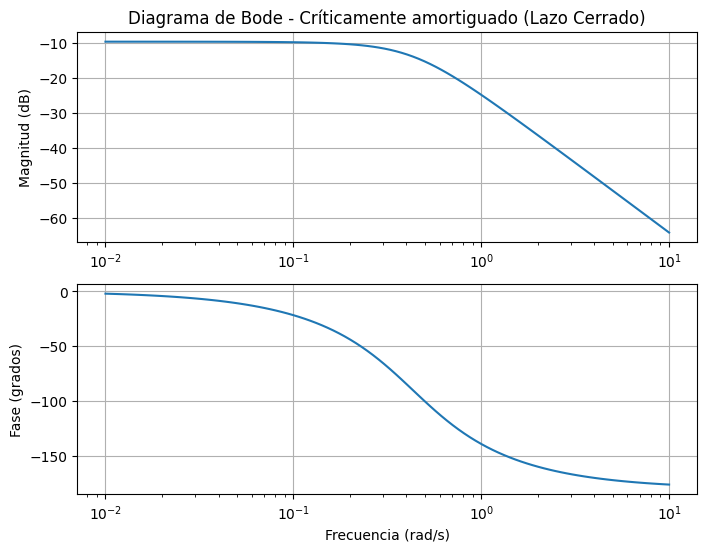

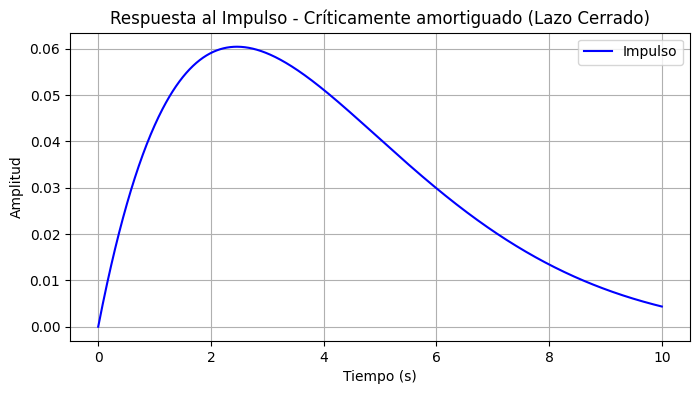

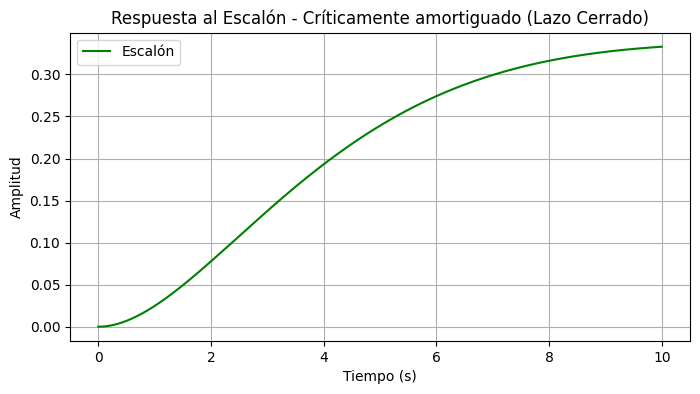

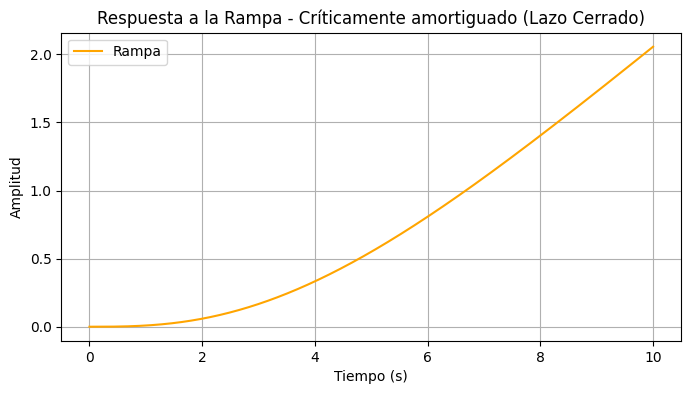


Caso: Sobreamortiguado - c = 22.63


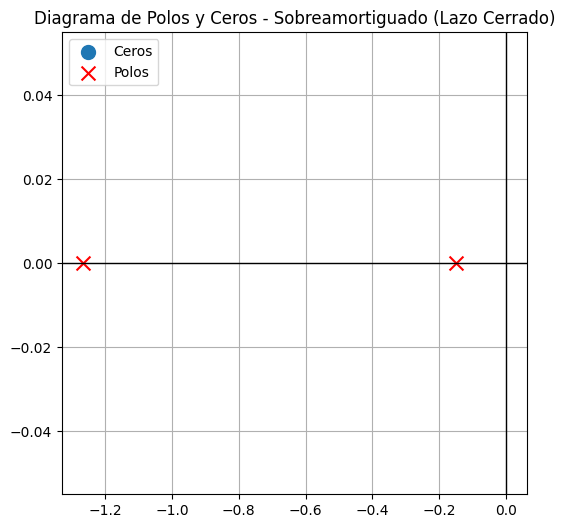

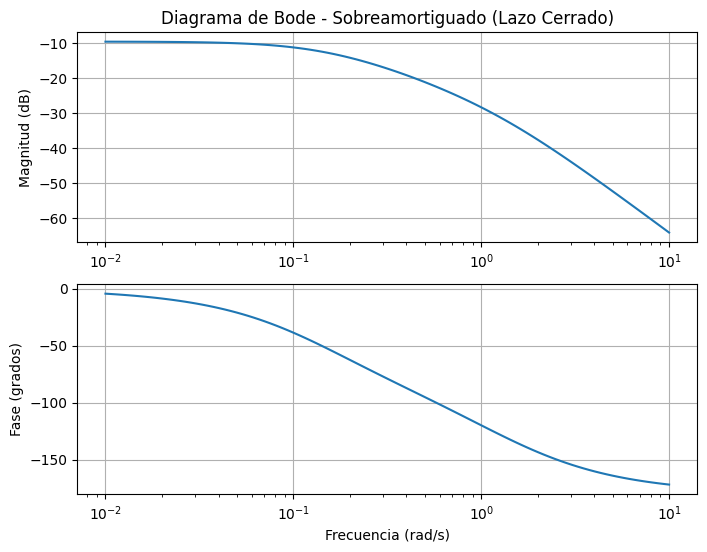

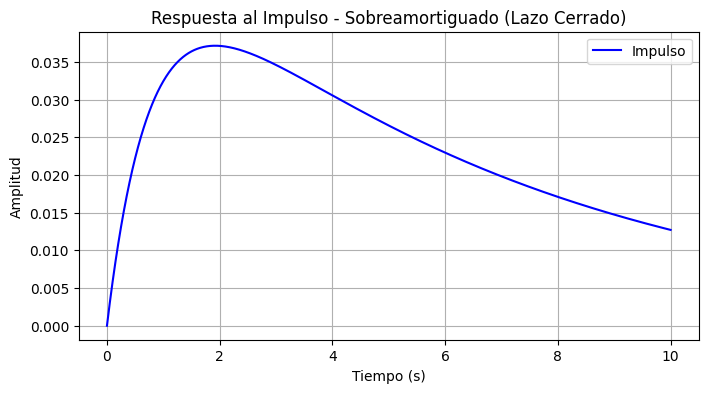

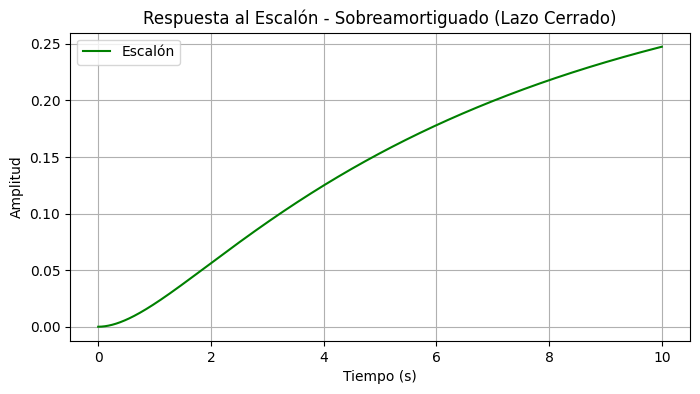

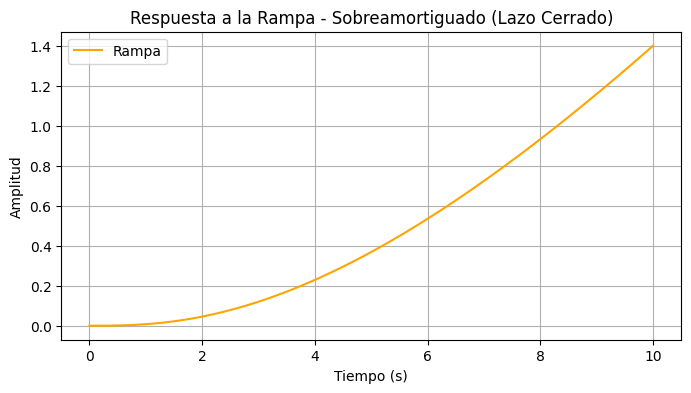

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal

# Definimos los valores de m y k
m = 16
k = 2

# Calculamos el valor crítico de c
c_critico = 2 * np.sqrt(m * k)

# Definimos los tres casos de amortiguamiento
casos = {
    "Subamortiguado": c_critico * 0.5,  # c menor que el crítico
    "Críticamente amortiguado": c_critico,  # c igual al crítico
    "Sobreamortiguado": c_critico * 2  # c mayor que el crítico
}

# Rango de tiempo para la simulación
t = np.linspace(0, 10, 1000)

for tipo, c in casos.items():
    print(f"\nCaso: {tipo} - c = {c:.2f}")

    # Función de transferencia en lazo abierto G(s) = 1 / (m s^2 + c s + k)
    num = [1]
    den = [m, c, k]
    system_open = signal.TransferFunction(num, den)

    # Función de transferencia en lazo cerrado H(s) = G(s) / (1 + G(s))
    num_closed = num  # En lazo cerrado, el numerador se mantiene igual
    den_closed = np.polyadd(num, den)  # 1 + G(s) en el denominador
    system_closed = signal.TransferFunction(num_closed, den_closed)

    # Obtener polos y ceros
    zeros, poles, _ = signal.tf2zpk(num_closed, den_closed)

    # Respuesta al impulso
    t_imp, y_imp = signal.impulse(system_closed, T=t)

    # Respuesta al escalón
    t_step, y_step = signal.step(system_closed, T=t)

    # Respuesta a la rampa (integrando la respuesta al escalón)
    y_ramp = np.cumsum(y_step) * (t[1] - t[0])

    # Diagrama de Polos y Ceros
    plt.figure(figsize=(6, 6))
    plt.scatter(np.real(zeros), np.imag(zeros), s=100, marker='o', label="Ceros")
    plt.scatter(np.real(poles), np.imag(poles), s=100, marker='x', label="Polos", color="red")
    plt.axhline(0, color='black', lw=1)
    plt.axvline(0, color='black', lw=1)
    plt.grid()
    plt.legend()
    plt.title(f"Diagrama de Polos y Ceros - {tipo} (Lazo Cerrado)")
    plt.show()

    # Diagrama de Bode
    w, mag, phase = signal.bode(system_closed)

    plt.figure(figsize=(8, 6))
    plt.subplot(2, 1, 1)
    plt.semilogx(w, mag)  # Magnitud
    plt.title(f"Diagrama de Bode - {tipo} (Lazo Cerrado)")
    plt.ylabel("Magnitud (dB)")
    plt.grid()

    plt.subplot(2, 1, 2)
    plt.semilogx(w, phase)  # Fase
    plt.xlabel("Frecuencia (rad/s)")
    plt.ylabel("Fase (grados)")
    plt.grid()
    plt.show()

    # Respuesta al impulso
    plt.figure(figsize=(8, 4))
    plt.plot(t_imp, y_imp, label="Impulso", color='blue')
    plt.xlabel("Tiempo (s)")
    plt.ylabel("Amplitud")
    plt.title(f"Respuesta al Impulso - {tipo} (Lazo Cerrado)")
    plt.grid()
    plt.legend()
    plt.show()

    # Respuesta al escalón
    plt.figure(figsize=(8, 4))
    plt.plot(t_step, y_step, label="Escalón", color='green')
    plt.xlabel("Tiempo (s)")
    plt.ylabel("Amplitud")
    plt.title(f"Respuesta al Escalón - {tipo} (Lazo Cerrado)")
    plt.grid()
    plt.legend()
    plt.show()

    # Respuesta a la rampa
    plt.figure(figsize=(8, 4))
    plt.plot(t, y_ramp, label="Rampa", color='orange')
    plt.xlabel("Tiempo (s)")
    plt.ylabel("Amplitud")
    plt.title(f"Respuesta a la Rampa - {tipo} (Lazo Cerrado)")
    plt.grid()
    plt.legend()
    plt.show()
